In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight. Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity. The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format and ARFF format to be used with the Weka tool.


In [2]:
df = pd.read_csv('obesity.csv')

In [4]:
df.rename(columns={'FAVC':'Cal','FCVC':'Veg','FAF':'Activity','NCP':'Meals','CAEC':'sec food'}, inplace=True)
df

,Gender,Age,Height,Weight,family_history_with_overweight,Cal,Veg,Meals,sec food,SMOKE,CH2O,SCC,Activity,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes':1,'no':0})
df['SMOKE'] = df['SMOKE'].replace({'no':0,'yes':1})
df['Cal'] = df['Cal'].replace({'no':0,'yes':1})

In [7]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'Cal', 'Veg', 'Meals', 'sec food', 'SMOKE', 'CH2O', 'SCC', 'Activity',
       'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [18]:
df = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','Meals',
         'Activity',
         'SMOKE','NObeyesdad']]


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X = df.drop('NObeyesdad', axis=1)
Y = df['NObeyesdad']



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.3, shuffle=True, random_state=42, 
                                                    stratify=Y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
report = classification_report(y_test, y_pred_test, digits=4)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9250    0.9024    0.9136        82
      Normal_Weight     0.6036    0.7791    0.6802        86
     Obesity_Type_I     0.8462    0.8302    0.8381       106
    Obesity_Type_II     0.9247    0.9663    0.9451        89
   Obesity_Type_III     1.0000    0.9897    0.9948        97
 Overweight_Level_I     0.8714    0.7011    0.7771        87
Overweight_Level_II     0.7500    0.6897    0.7186        87

           accuracy                         0.8391       634
          macro avg     0.8458    0.8369    0.8382       634
       weighted avg     0.8483    0.8391    0.8407       634



In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'knn__n_neighbors': [i for i in range(3,10)],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
Best Score: 0.8693234050376908


In [29]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'Meals', 'Activity', 'SMOKE', 'NObeyesdad'],
      dtype='object')

In [30]:
from sklearn.compose import ColumnTransformer

numeric_features = ['Age', 'Height', 'Weight','Meals', 'Activity']
categorical_features = ['Gender', 'family_history_with_overweight', 'SMOKE', 'NObeyesdad']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ])

best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='manhattan'))
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
report_2 = classification_report(y_test, y_pred, digits=4)
print(report_2)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9744    0.9268    0.9500        82
      Normal_Weight     0.7879    0.9070    0.8432        86
     Obesity_Type_I     0.9143    0.9057    0.9100       106
    Obesity_Type_II     0.9663    0.9663    0.9663        89
   Obesity_Type_III     1.0000    1.0000    1.0000        97
 Overweight_Level_I     0.8625    0.7931    0.8263        87
Overweight_Level_II     0.8140    0.8046    0.8092        87

           accuracy                         0.9022       634
          macro avg     0.9028    0.9005    0.9007       634
       weighted avg     0.9044    0.9022    0.9025       634



In [32]:
df_2 = df.copy()
df_2['predicted'] = best_model.predict(df)
df_2

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,NObeyesdad,predicted
0,0,21.000000,1.620000,64.000000,1,3.0,0.000000,0,Normal_Weight,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,3.0,3.000000,1,Normal_Weight,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,3.0,2.000000,0,Normal_Weight,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,3.0,2.000000,0,Overweight_Level_I,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,1.0,0.000000,0,Overweight_Level_II,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,3.0,1.676269,0,Obesity_Type_III,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,3.0,1.341390,0,Obesity_Type_III,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,3.0,1.414209,0,Obesity_Type_III,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,3.0,1.139107,0,Obesity_Type_III,Obesity_Type_III


In [93]:
import pickle
with open('model_3.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [39]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,NObeyesdad
90,0,25.000000,1.630000,93.000000,0,4.000000,2.000000,0,Obesity_Type_II
513,0,21.243142,1.598019,44.845655,0,1.726260,1.318170,0,Insufficient_Weight
1100,1,19.149706,1.699818,78.000000,1,2.491315,0.000000,0,Overweight_Level_II
339,0,19.000000,1.530000,42.000000,0,3.000000,2.000000,0,Insufficient_Weight
612,0,23.018443,1.584785,44.376637,0,2.127797,0.995735,0,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...
1567,1,30.520854,1.784049,120.644178,1,3.000000,0.838739,0,Obesity_Type_II
1336,1,21.011124,1.856315,118.183797,1,3.000000,0.788585,0,Obesity_Type_I
609,1,19.979810,1.753360,54.997374,1,3.494849,1.949070,0,Insufficient_Weight
1659,1,23.141402,1.849307,121.658729,1,2.510135,0.769709,0,Obesity_Type_II


In [40]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE
90,0,25.000000,1.630000,93.000000,0,4.000000,2.000000,0
513,0,21.243142,1.598019,44.845655,0,1.726260,1.318170,0
1100,1,19.149706,1.699818,78.000000,1,2.491315,0.000000,0
339,0,19.000000,1.530000,42.000000,0,3.000000,2.000000,0
612,0,23.018443,1.584785,44.376637,0,2.127797,0.995735,0
...,...,...,...,...,...,...,...,...
1567,1,30.520854,1.784049,120.644178,1,3.000000,0.838739,0
1336,1,21.011124,1.856315,118.183797,1,3.000000,0.788585,0
609,1,19.979810,1.753360,54.997374,1,3.494849,1.949070,0
1659,1,23.141402,1.849307,121.658729,1,2.510135,0.769709,0


In [92]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=41, max_depth=8)
tree.fit(X_train, y_train)
y_pred_2 = tree.predict(X_test)
report_3 = classification_report(y_test, y_pred_2, digits=4)
print(report_3)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9241    0.8902    0.9068        82
      Normal_Weight     0.8608    0.7907    0.8242        86
     Obesity_Type_I     0.9279    0.9717    0.9493       106
    Obesity_Type_II     0.9882    0.9438    0.9655        89
   Obesity_Type_III     1.0000    0.9897    0.9948        97
 Overweight_Level_I     0.8557    0.9540    0.9022        87
Overweight_Level_II     0.9425    0.9425    0.9425        87

           accuracy                         0.9290       634
          macro avg     0.9285    0.9261    0.9265       634
       weighted avg     0.9299    0.9290    0.9287       634



In [95]:
import pickle
with open('model_3.pkl', 'wb') as f:
    pickle.dump(tree, f)

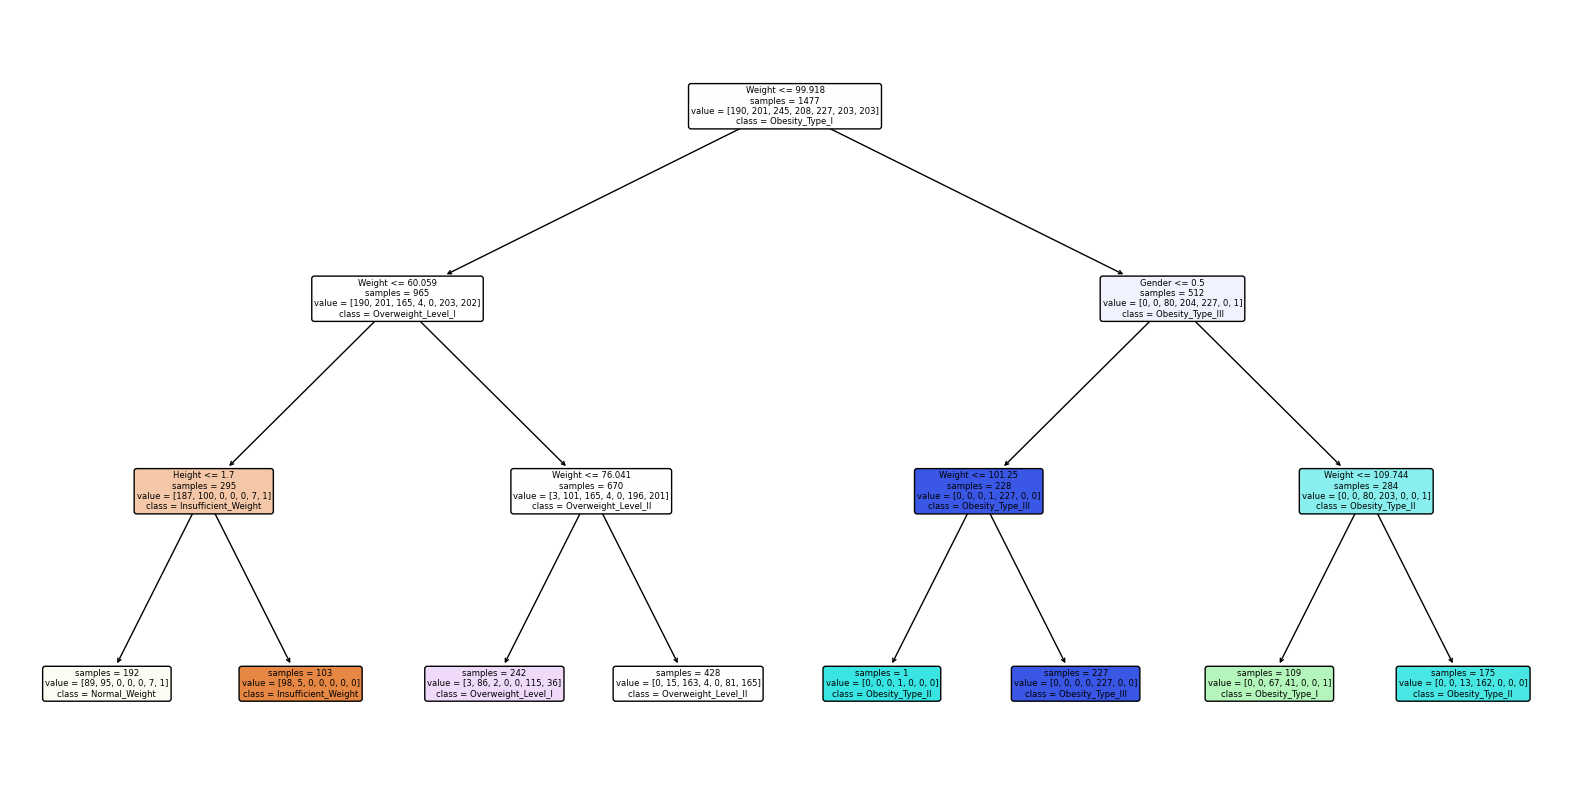

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
class_names = sorted(y_train.unique())
plot_tree(tree, ax=ax, feature_names=X_train.columns, impurity = False, filled = True, rounded = True, 
          class_names = class_names)
plt.show()

In [107]:
filtered_df = df[(df['Height'] < 1.6) & (df['Gender'] == 0) & (df['Weight']>60)]
filtered_df_2 = filtered_df.copy()
filtered_df_2 = filtered_df_2.drop(columns='NObeyesdad', axis = 1)
filtered_df['predict'] = tree.predict(filtered_df_2)
filtered_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17396\3262196227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['predict'] = tree.predict(filtered_df_2)


,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,NObeyesdad,predict
17,0,29.000000,1.530000,78.000000,0,1.0,0.000000,0,Obesity_Type_I,Obesity_Type_I
31,0,31.000000,1.580000,68.000000,1,1.0,1.000000,0,Overweight_Level_II,Overweight_Level_II
35,0,21.000000,1.500000,65.000000,1,3.0,2.000000,0,Overweight_Level_II,Overweight_Level_II
45,0,21.000000,1.530000,65.000000,1,3.0,0.000000,0,Overweight_Level_II,Overweight_Level_II
104,0,38.000000,1.560000,80.000000,1,3.0,0.000000,0,Obesity_Type_I,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...
1896,0,25.934757,1.579893,102.134646,1,3.0,0.020060,0,Obesity_Type_III,Obesity_Type_III
1969,0,25.954995,1.592529,102.874549,1,3.0,0.006265,0,Obesity_Type_III,Obesity_Type_III
1988,0,26.000000,1.594776,110.640929,1,3.0,0.000000,0,Obesity_Type_III,Obesity_Type_III
2016,0,25.940153,1.596813,102.320437,1,3.0,0.005939,0,Obesity_Type_III,Obesity_Type_III


In [109]:
filtered_df_3 = filtered_df[(filtered_df['Meals']>=3) & (filtered_df['Activity']==0)]
filtered_df_3 = filtered_df_3[filtered_df_3['Age']<=26]
filtered_df_3

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,NObeyesdad,predict
45,0,21.000000,1.530000,65.000000,1,3.0,0.0,0,Overweight_Level_II,Overweight_Level_II
202,0,26.000000,1.560000,102.000000,1,3.0,0.0,1,Obesity_Type_III,Obesity_Type_III
781,0,24.023972,1.599697,64.808022,0,3.0,0.0,0,Overweight_Level_I,Overweight_Level_I
802,0,19.816228,1.507853,64.259379,0,3.0,0.0,0,Overweight_Level_I,Overweight_Level_I
1800,0,26.000000,1.584782,105.055597,1,3.0,0.0,0,Obesity_Type_III,Obesity_Type_III
1810,0,26.000000,1.583889,110.545378,1,3.0,0.0,0,Obesity_Type_III,Obesity_Type_III
1988,0,26.000000,1.594776,110.640929,1,3.0,0.0,0,Obesity_Type_III,Obesity_Type_III


In [110]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,3.0,0.000000,0,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,3.0,3.000000,1,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,3.0,2.000000,0,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,3.0,2.000000,0,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,1.0,0.000000,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,3.0,1.676269,0,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,3.0,1.341390,0,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,3.0,1.414209,0,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,3.0,1.139107,0,Obesity_Type_III


In [117]:
A = df[(df['Gender']==1) & (df['Weight']>65) & (df['Height']<1.65) & (df['Activity']>=2)]
A

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,NObeyesdad
144,1,22.0,1.61,67.0,1,4.0,2.0,0,Overweight_Level_I
241,1,22.0,1.60,66.0,0,3.0,3.0,0,Overweight_Level_I
369,1,20.0,1.58,74.0,0,3.0,3.0,0,Overweight_Level_II


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# Inisialisasi model RFC
rfc = RandomForestClassifier(random_state=41)

# Definisikan grid parameter yang ingin diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', RandomForestClassifier(random_state=41))
])

# Buat objek GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Lakukan grid search pada data training
grid_search.fit(X_train, y_train)

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Evaluasi model terbaik pada data test
y_pred = best_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
print(best_model)
print(report)


RandomForestClassifier(n_estimators=200, random_state=41)
                     precision    recall  f1-score   support

Insufficient_Weight     1.0000    0.9268    0.9620        82
      Normal_Weight     0.8200    0.9535    0.8817        86
     Obesity_Type_I     0.9533    0.9623    0.9577       106
    Obesity_Type_II     1.0000    0.9663    0.9829        89
   Obesity_Type_III     1.0000    0.9897    0.9948        97
 Overweight_Level_I     0.9294    0.9080    0.9186        87
Overweight_Level_II     0.9643    0.9310    0.9474        87

           accuracy                         0.9495       634
          macro avg     0.9524    0.9482    0.9493       634
       weighted avg     0.9532    0.9495    0.9504       634



In [121]:
best_rfc = RandomForestClassifier(n_estimators=200, random_state=41)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array(['Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Normal_Weight', 'Obesity_Type_III', 'Obesity_Type_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_I', 'Overweight_Level_I', 'Obesity_Type_I',
       'Normal_Weight', 'Obesity_Type_III', 'Overweight_Level_I',
       'Normal_Weight', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Overweight_Level_II', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_III', 'Insufficient_Weight',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_II',
       'Normal_Weight', 'Obesity_Type_II', 'Insufficient_Weight',
       'Normal_Weight', 'Overweight_Level_II', 'Normal_Weight',
       'N

In [122]:
import pickle
with open('model_rfc.pkl', 'wb') as f:
    pickle.dump(tree, f)

In [130]:
from sklearn.svm import SVC

# Inisialisasi model SVC
svm = SVC(random_state=41)

# Definisikan grid parameter yang ingin diuji
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=41))
])
# Buat objek GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Lakukan grid search pada data training
grid_search.fit(X_train, y_train)

# Dapatkan model terbaik
best_model_SVM = grid_search.best_estimator_

# Evaluasi model terbaik pada data test
y_pred = best_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
print(report)
print(best_model_SVM)


                     precision    recall  f1-score   support

Insufficient_Weight     1.0000    0.9268    0.9620        82
      Normal_Weight     0.8200    0.9535    0.8817        86
     Obesity_Type_I     0.9533    0.9623    0.9577       106
    Obesity_Type_II     1.0000    0.9663    0.9829        89
   Obesity_Type_III     1.0000    0.9897    0.9948        97
 Overweight_Level_I     0.9294    0.9080    0.9186        87
Overweight_Level_II     0.9643    0.9310    0.9474        87

           accuracy                         0.9495       634
          macro avg     0.9524    0.9482    0.9493       634
       weighted avg     0.9532    0.9495    0.9504       634

SVC(C=10, kernel='linear', random_state=41)


In [132]:
model_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=41, kernel='linear', C=10))
])
model_svm = SVC(random_state = 41, kernel = 'linear', C=10)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
report_SVM_Best = classification_report(y_test, y_pred_svm, digits=4)
print(report_SVM_Best)
y_pred_svm

                     precision    recall  f1-score   support

Insufficient_Weight     0.9176    0.9512    0.9341        82
      Normal_Weight     0.8861    0.8140    0.8485        86
     Obesity_Type_I     0.9346    0.9434    0.9390       106
    Obesity_Type_II     0.9884    0.9551    0.9714        89
   Obesity_Type_III     1.0000    1.0000    1.0000        97
 Overweight_Level_I     0.8105    0.8851    0.8462        87
Overweight_Level_II     0.9176    0.8966    0.9070        87

           accuracy                         0.9227       634
          macro avg     0.9221    0.9207    0.9209       634
       weighted avg     0.9240    0.9227    0.9228       634



array(['Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_I',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Normal_Weight', 'Obesity_Type_III', 'Obesity_Type_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_I', 'Overweight_Level_I', 'Obesity_Type_I',
       'Insufficient_Weight', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Overweight_Level_II', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_III', 'Insufficient_Weight',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_II',
       'Overweight_Level_I', 'Obesity_Type_II', 'Insufficient_Weight',
       'Normal_Weight', 'Overweight_Level_II', 'Overweight_Lev

In [133]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model_svm, f)